# Deep Learning Homework: Waste classification
Authors: Gergály Anna, Mészáros Péter

# Downloading the datasets

Insert your Kaggle API keys, to download the datasets with the Kaggle API.
The first block sets the environment variables for the Kaggle API to work. More info about creating a Kaggle API Token can be found here: https://www.kaggle.com/docs/api.
The second block downloads the datasets from Kaggle.
The third block downloads a third dataset from github as a zip file, and then extracts it.

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = '' #insert your api token data here
os.environ['KAGGLE_KEY'] = ''

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('asdasdasasdas/garbage-classification', path="./garbage1", quiet=True, unzip=True)
api.dataset_download_files('mostafaabla/garbage-classification', path="./garbage2", quiet=True, unzip=True)

100%|██████████| 82.0M/82.0M [00:00<00:00, 210MB/s]


100%|██████████| 239M/239M [00:01<00:00, 178MB/s]


In [ ]:
!pip install wget > /dev/null
import wget
wget.download("https://github.com/nikhilvenkatkumsetty/TrashBox/archive/refs/heads/main.zip", out="./garbage3.zip")

In [ ]:
import zipfile
with zipfile.ZipFile("garbage3.zip", mode='r') as z:
    z.extractall("./garbage3")

In [ ]:
dataset1_directory='garbage1/Garbage classification/Garbage classification/'
dataset2_directory='garbage2/garbage_classification/'
dataset3_directory='garbage3/TrashBox-main/TrashBox_train_set'
dataset_directories = [dataset1_directory, dataset2_directory, dataset3_directory]

### Google colab drive mount

Instead of downloading the datasets every time when we use Colab, we download them from our own Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/My Drive/Colab Notebooks/AIT/garbage1' .
!cp -r '/content/drive/My Drive/Colab Notebooks/AIT/garbage2' .
!cp -r '/content/drive/My Drive/Colab Notebooks/AIT/garbage3' .

## Preprocessing the data

Removing the last unnecessary classes from the second dataset, which can't be found in the first dataset.
Merging white-glass, brown-glass, green-glass classes into one class, named glass.

In [ ]:
import shutil
import os
removable_classes=['battery','clothes', 'biological', 'shoes']
for label in removable_classes:
    shutil.rmtree(os.path.join(dataset2_directory,label))
os.rename('garbage2/garbage_classification/brown-glass', 'garbage2/garbage_classification/glass')
glasses = [os.path.join(dataset2_directory,'white-glass'), os.path.join(dataset2_directory,'green-glass')]
for glass_directory_name in glasses:
    for filename in os.listdir(glass_directory_name):
        shutil.move(os.path.join(glass_directory_name, filename), os.path.join('garbage2/garbage_classification/glass', filename))
    os.rmdir(glass_directory_name)

Adding the extra classes to the first and second datasets (e-waste and medical) and adding trash to the third dataset.

In [ ]:
os.mkdir(os.path.join(dataset1_directory, 'medical'))
os.mkdir(os.path.join(dataset2_directory, 'e-waste'))
os.mkdir(os.path.join(dataset2_directory, 'medical'))
os.mkdir(os.path.join(dataset3_directory, 'trash'))

A few images had problems, we had to delete them.

In [ ]:
images_to_delete = ['garbage3/TrashBox-main/TrashBox_train_set/cardboard/cardboard 1094.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/cardboard/cardboard 1075.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/cardboard/cardboard 2076.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/metal/metal 2008.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/metal/metal 1772.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/e-waste/e-waste 1719.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/e-waste/e-waste 1607.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/e-waste/e-waste 1483.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/e-waste/e-waste 1585.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/medical/medical 1858.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/medical/medical 1385.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/glass/glass 1160.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/glass/glass 1662.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/glass/glass 2388.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/glass/glass 1564.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/glass/glass 1845.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/paper/paper 943.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/paper/paper 2273.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/paper/paper 942.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/paper/paper 1001.jpg',
'garbage3/TrashBox-main/TrashBox_train_set/paper/paper 1919.jpg']
for image in images_to_delete:
  os.remove(image)

Many images from the third dataset were in a bad format, Tensorflow couldn't read them. The images are converted to the correct format with opencv.


In [ ]:
import os
import cv2
def check_images(directory):
    bad_images=[]
    class_list= os.listdir(directory)
    for image_class in class_list:
        class_path=os.path.join (directory, image_class)
        print ('processing class directory ', image_class)
        if os.path.isdir(class_path):
            file_list=os.listdir(class_path)
            for file in file_list:               
                file_path=os.path.join (class_path,file)
                if os.path.isfile(file_path):
                    try:
                        img=cv2.imread(file_path)
                        shape=img.shape
                        cv2.imwrite(file_path, img)
                    except:
                        bad_images.append(file_path)
    return bad_images

source_dir = dataset3_directory
bad_file_list=check_images(source_dir)
if len(bad_file_list) !=0:
    print('bad images:')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print('no bad images were found')
for bad_image in bad_file_list:
    os.remove(bad_image)

processing class directory  paper
processing class directory  medical
processing class directory  cardboard
processing class directory  glass
processing class directory  metal
processing class directory  plastic
processing class directory  trash
processing class directory  e-waste
no bad images were found


## Reading the datasets
Importing libraries and setting hyperparameter variables.
The datasets are split for training, validation and test in a 4:1:1 ratio.

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image as image_utils
import tensorflow as tf
import numpy as np

class_names=['glass', 'paper', 'cardboard', 'trash', 'metal', 'plastic', 'e-waste', 'medical']
image_size=(256, 256)
validation_split=1/6
seed=111
batch_size=32

In [ ]:
train_ = []
val_ = []
for i in range(3):
    train_.append(keras.utils.image_dataset_from_directory(
    dataset_directories[i],
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    seed=seed,
    subset='training'
    ))
    val_.append(keras.utils.image_dataset_from_directory(
    dataset_directories[i],
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    seed=seed,
    subset='validation'
    ))

Found 2544 files belonging to 8 classes.
Using 2120 files for training.
Found 2544 files belonging to 8 classes.
Using 424 files for validation.
Found 6283 files belonging to 8 classes.
Using 5236 files for training.
Found 6283 files belonging to 8 classes.
Using 1047 files for validation.
Found 14324 files belonging to 8 classes.
Using 11937 files for training.
Found 14324 files belonging to 8 classes.
Using 2387 files for validation.


Normalizing the images, and concatenating the datasets.

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
for i in range(3):
    train_[i] = train_[i].map(lambda x, y: (normalization_layer(x), y))
    val_[i] = val_[i].map(lambda x, y: (normalization_layer(x), y))

In [ ]:
full = train_[0].concatenate(train_[1]).concatenate(train_[2]) #training and test X and Y
val = val_[0].concatenate(val_[1]).concatenate(val_[2]) #validation X and Y

This way the datasets are one after another, which would cause us problems (the test set not including every class), so we shuffle them using sample from dataset.

In [ ]:
#sum_cardinality = train_[0].cardinality().numpy()+train_[1].cardinality().numpy()+train_[2].cardinality().numpy()
#weights = [train_[0].cardinality().numpy()/sum_cardinality,
           train_[1].cardinality().numpy()/sum_cardinality,
           train_[2].cardinality().numpy()/sum_cardinality]

In [ ]:
#from tensorflow.data.Dataset import sample_from_datasets
#full = sample_from_datasets(
#    [train_[0], train_[1], train_[2]], weights
#)

In [ ]:
test = full.skip(full.cardinality().numpy()*4/5) #splitting test from train
train = full.take(full.cardinality().numpy()*4/5)

## Traning the model
### First model: EffientNetB5

We chose a medium sized EfficientNet trained on image net as our first model, to ensure that it trains at a reasonable pace and also yields acceptable results. We rescaled the inputs to the range EfficientNet expects them in and added a GlobalAveragePooling layer and a Dense layer with 8 nodes to serve as our output layer. We chose a softmax activation function to go with our classification problem.

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB5
from tensorflow.keras.layers import Rescaling, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

In [ ]:
base_model1 = EfficientNetB5(include_top = False, weights="imagenet", input_shape=(256, 256, 3))
base_model1.trainable = False
scale_layer = Rescaling(scale=255)
inputs = keras.Input(shape=(256, 256, 3))
x = scale_layer(inputs)
x = base_model1(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(8, activation='softmax')(x)
model1 = keras.Model(inputs, x)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 efficientnetb5 (Functional)  (None, 8, 8, 2048)       28513527  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 16392     
                                                                 
Total params: 28,529,919
Trainable params: 16,392
Non-trainable params: 28,513,527
____________________________________________

In [ ]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
model1.fit(train, validation_data=val, epochs=50, callbacks=[es])

Epoch 1/50
465/465 [==============================] - 395s 772ms/step - loss: 0.5793 - accuracy: 0.8247 - val_loss: 0.5859 - val_accuracy: 0.8204
Epoch 2/50
465/465 [==============================] - 356s 751ms/step - loss: 0.3669 - accuracy: 0.8825 - val_loss: 0.5085 - val_accuracy: 0.8433
Epoch 3/50
465/465 [==============================] - 355s 750ms/step - loss: 0.3080 - accuracy: 0.9038 - val_loss: 0.4783 - val_accuracy: 0.8550
Epoch 4/50
465/465 [==============================] - 356s 750ms/step - loss: 0.2721 - accuracy: 0.9151 - val_loss: 0.4632 - val_accuracy: 0.8593
Epoch 5/50
465/465 [==============================] - 356s 750ms/step - loss: 0.2462 - accuracy: 0.9244 - val_loss: 0.4546 - val_accuracy: 0.8647
Epoch 6/50
465/465 [==============================] - 355s 749ms/step - loss: 0.2244 - accuracy: 0.9304 - val_loss: 0.4506 - val_accuracy: 0.8682
Epoch 7/50
465/465 [==============================] - 354s 748ms/step - loss: 0.2068 - accuracy: 0.9375 - val_loss: 0.4481 -

In [ ]:
model1.save_weights('./checkpoints/my_checkpoint') #to save the weights from Colab

In [ ]:
model1.load_weights('./checkpoints/my_checkpoint')

We use our previously split test data to evaluate the model.

In [ ]:
model1.evaluate(test)

121/121 [==============================] - 80s 592ms/step - loss: 0.0548 - accuracy: 0.9915


[0.05476154759526253, 0.9914772510528564]

We extract our test set's labels and prepare our model's predictions for this set to create a confusion matrix visualization of the results.

In [ ]:
labels = np.argmax(np.concatenate([label for image, label in test], axis=0), axis=1)

In [ ]:
preds = model1.predict(test)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

prediction = np.argmax(preds, axis=1)

conf=confusion_matrix(labels, prediction)

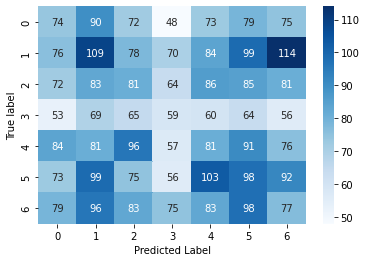

In [ ]:
import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues') 
ax.set(xlabel='Predicted Label',
       ylabel='True label');

## Second model: own model

For our second model, we decided to create our own. We added 8 convolutional layers with dropout, max and average pooling inbetween and finished it off with 3 dense layers with relu activation and HeNormal initialization and an output layer the same as our last model's. We plan on refining this model for our finished assignment to achieve better results.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.initializers import Constant

bias_initializer = Constant(0.1)

model2 = Sequential()
model2.add(Conv2D(filters=10, kernel_size=(5,5),padding="same", input_shape=(256, 256, 3), kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Conv2D(filters=10, kernel_size=(5,5),padding="same", kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(MaxPool2D())
model2.add(Dropout(rate=0.1))
model2.add(Conv2D(filters=10, kernel_size=(3,3),padding="same", kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Conv2D(filters=10, kernel_size=(3,3),padding="same", activation='relu', kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(MaxPool2D())
model2.add(Dropout(rate=0.1))
model2.add(Conv2D(filters=5, kernel_size=(3,3),padding="same", kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Conv2D(filters=5, kernel_size=(3,3),padding="same", kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(AveragePooling2D())
model2.add(Dropout(rate=0.1))
model2.add(Conv2D(filters=5, kernel_size=(3,3),padding="same", kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Conv2D(filters=5, kernel_size=(3,3),padding="same", kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(AveragePooling2D())
model2.add(Flatten())
model2.add(Dense(1000, activation='relu', kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Dense(1000, activation='relu', kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Dense(1000, activation='relu', kernel_initializer='HeNormal', bias_initializer=bias_initializer))
model2.add(Dense(8, activation='softmax'))

model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 10)      760       
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 10)      2510      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 10)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 10)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 10)      910       
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [ ]:
model2.fit(train, validation_data=val, epochs=20, callbacks=[es])

Epoch 1/20
484/484 [==============================] - 115s 236ms/step - loss: 1.5762 - accuracy: 0.3855 - val_loss: 1.9600 - val_accuracy: 0.2665
Epoch 2/20
484/484 [==============================] - 113s 232ms/step - loss: 1.4293 - accuracy: 0.4519 - val_loss: 1.8781 - val_accuracy: 0.3230
Epoch 3/20
484/484 [==============================] - 113s 232ms/step - loss: 1.2740 - accuracy: 0.5241 - val_loss: 1.7519 - val_accuracy: 0.3717
Epoch 4/20
484/484 [==============================] - 113s 232ms/step - loss: 1.0591 - accuracy: 0.6190 - val_loss: 1.8122 - val_accuracy: 0.4025
Epoch 5/20
484/484 [==============================] - 113s 232ms/step - loss: 0.8210 - accuracy: 0.7089 - val_loss: 1.9400 - val_accuracy: 0.4093
Epoch 6/20
484/484 [==============================] - 113s 232ms/step - loss: 0.6365 - accuracy: 0.7813 - val_loss: 2.1938 - val_accuracy: 0.4023
Epoch 7/20
484/484 [==============================] - 112s 230ms/step - loss: 0.5075 - accuracy: 0.8255 - val_loss: 2.1272 -

In [ ]:
model2.save_weights('./checkpoints/model2_5epoch')

We use the same process to evaluate the model and visualize the results on the test data.

In [ ]:
model2.evaluate(test)

121/121 [==============================] - 75s 174ms/step - loss: 1.7147 - accuracy: 0.3504


[1.7146955728530884, 0.35042956471443176]

In [ ]:
labels = np.argmax(np.concatenate([label for image, label in test], axis=0), axis=1)

In [ ]:
preds = model2.predict(test)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

prediction = np.argmax(preds, axis=1)

conf=confusion_matrix(labels, prediction)

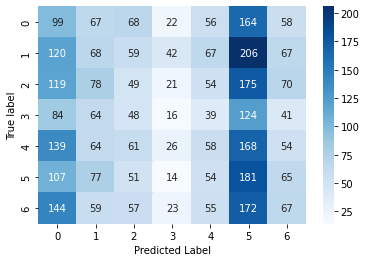

In [ ]:
import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues') 
ax.set(xlabel='Predicted Label',
       ylabel='True label');